# Iteration test
This file demonstrates how to initialize an Equilibrium object from leading order quantities and tests its accuracy.

In [1]:
# This file implements and tests recursion relations
import numpy as np
from matplotlib import pyplot as plt

# for importing parsed codes
import sys
import cProfile
sys.path.insert(1,'../python_source/MHD_parsed/')
sys.path.insert(1,'../python_source/')
from chiphifunc import *
from math_utilities import *
from chiphiepsfunc import *
from chiphifunc_test_suite import *
from equilibrium import *


import MHD_parsed
debug_path = '../test_data_eduardo/'

Configuration has 1.0 field periods.
Axis shape:


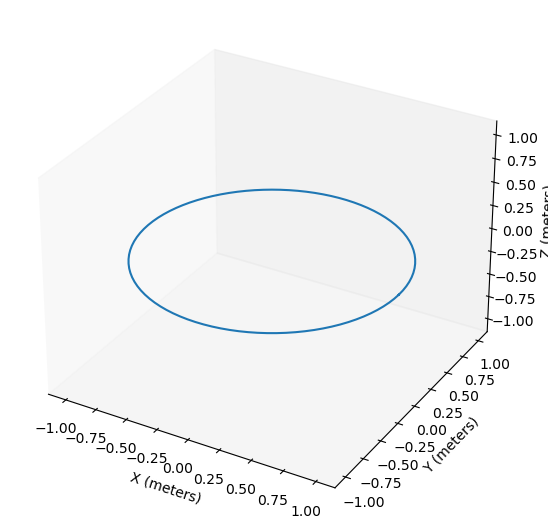

In [2]:
# No B theta
B_psi_coef_cp, B_theta_coef_cp, \
    Delta_coef_cp, p_perp_coef_cp,\
    X_coef_cp, Y_coef_cp, Z_coef_cp, \
    iota_coef, dl_p,\
    nfp, Xi_0, eta, \
    B_denom_coef_c, B_alpha_coef, \
    kap_p, tau_p = read_first_three_orders(
        debug_path+'circ/', 
        R_array=[2,0,1,2,0.0001,0],
        Z_array=[1,2,0,0.001]
    )

In [3]:
print(B_psi_coef_cp.get_order())
print(B_theta_coef_cp.get_order())
print(Delta_coef_cp.get_order())
print(p_perp_coef_cp.get_order())
print(X_coef_cp.get_order())
print(Y_coef_cp.get_order())
print(Z_coef_cp.get_order())

1
2
2
2
3
3
3


In [4]:
B_psi_coef_cp[1]

## Initializing an `Equilibrium`
### Required quantities and orders
Unknowns:

1. X_coef_cp: 2
2. Y_coef_cp: 2
3. Z_coef_cp: 2
4. B_psi_coef_cp: 0
5. B_theta_coef_cp: 2
6. iota_coef: 0
7. Delta_coef_cp: 3
8. p_perp_coef_cp: 3

Known constants:
1. B_denom_coef_c: 2
2. B_alpha_coef: 1
3. kap_p
4. dl_p 
5. tau_p
6. eta

In [5]:
B_alpha_coef.get_order()

1

In [6]:
equilibrium = Equilibrium.from_known(
    X_coef_cp=X_coef_cp.mask(2),
    Y_coef_cp=Y_coef_cp.mask(2),
    Z_coef_cp=Z_coef_cp.mask(2),
    B_psi_coef_cp=B_psi_coef_cp.mask(0),
    B_theta_coef_cp=B_theta_coef_cp.mask(2),
    B_denom_coef_c=B_denom_coef_c.mask(2),
    B_alpha_coef=B_alpha_coef.mask(1),
    iota_coef=iota_coef.mask(0), 
    kap_p=kap_p, 
    dl_p=dl_p, 
    tau_p=tau_p,
    p_perp_coef_cp = p_perp_coef_cp.mask(2), 
    Delta_coef_cp = Delta_coef_cp.mask(2))
equilibrium.get_order()

2

## Iterate 2 orders using only the magentic equations

In [7]:
iota_coef[1]

-0.66367278

In [8]:
iterate_2(
    equilibrium,
    n_eval=4,
    B_alpha_nb2=0,
    B_denom_nm1=B_denom_coef_c[3], B_denom_n=0,
    iota_new=iota_coef[1],
    max_freq=(20, 20)
)


Evaluating order 3 4


2023-05-14 09:31:53.504998: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module jit_eval_loop] Very slow compile?  If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2023-05-14 09:31:57.222897: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:133] The operation took 2m3.719718s

********************************
[Compiling module jit_eval_loop] Very slow compile?  If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2023-05-14 09:50:05.007710: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:133] The operation took 15m10.103785s

********************************
[Compiling module jit__lambda_] Very slow compile?  If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to

In [9]:
# equilibrium.iterate_2(
#     B_alpha_nb2=0,
#     B_denom_nm1=B_denom_coef_c[3], B_denom_n=0,
#     iota_new=iota_coef[1],
#     loop_max_freq=(70, 90)
# )
# print('Done')

## Accessing data and checking accuracy

In [10]:
equilibrium.display_order(3)

B_psi_coef_cp n = 1
display_content(): input is ChiPhiFuncSpecial.
ChiPhiFunc(conditional 0)
B_theta_coef_cp n = 3
display_content(): input is ChiPhiFuncSpecial.
ChiPhiFunc(conditional 0)
Delta_coef_cp n = 3
display_content(): input is ChiPhiFuncSpecial.
ChiPhiFunc(conditional 0)
X_coef_cp n = 3
display_content(): input is ChiPhiFuncSpecial.
ChiPhiFunc(conditional 0)
Y_coef_cp n = 3
display_content(): input is ChiPhiFuncSpecial.
ChiPhiFunc(conditional 0)
Z_coef_cp n = 3
display_content(): input is ChiPhiFuncSpecial.
ChiPhiFunc(conditional 0)
iota_coef n = 3
display_content(): input is ChiPhiFuncSpecial.
ChiPhiFunc(conditional 0)
p_perp_coef_cp n = 3
display_content(): input is ChiPhiFuncSpecial.
ChiPhiFunc(conditional 0)


In [11]:
(J, Cb, Ck, Ct, I, II, III) = equilibrium.check_governing_equations(3)
J.display_content()
Cb.display_content()
Ck.display_content()
Ct.display_content()
I.display_content()
II.display_content()
III.display_content()


ValueError: Validation order should be <= than the current order

In [ ]:
2.0//2


In [ ]:
Delta_n_inhomog_component = MHD_parsed.eval_inhomogenous_Delta_n_cp(3,
            B_denom_coef_c.mask(3),
            p_perp_coef_cp.mask(4),
            Delta_coef_cp.mask(3-1).zero_append(),
            iota_coef.mask(1))

In [ ]:
print(Delta_n_inhomog_component)